# Kaggle Titanic Project

## # Source
---

Kaggle's [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) .<br>

## Kaggle Titanic Project - Machine Learning 
#### Shifra Goldberg

### Problem Definition
* The Titanic is one of the most infamous shipwrecks in history.
* On April 15, 1912, during her maiden voyage, the shit sank after colliding with an iceberg. 
* 1502/2224 passengers and did not survive 
While there were some external conditions that might have impacted survival
This project will evaluate what factors if any may have contributed to surival.
Are there groups that had higher survival rates?
Note there were not enougt life boats on board.


### Sourcing Data
Quickly describe the content of the data, citing the source, and explaining why you believe this dataset can be used to solve your problem.

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data from its source format into a pandas dataframe
# https://www.kaggle.com/c/titanic

train = ('data/train.csv')
test =('data/test.csv')

training_data = pd.read_csv(train)

In [3]:
# create copy of training data
train_df = training_data.copy()

In [4]:
# set up dataframe for testing data
# note the testing set not not have survived as that will be our predictor 
test =('data/test.csv')
test_data = pd.read_csv(test)


In [5]:
# create copy of testing data just in case 
test_df=test_data.copy()

In [6]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
train_df.shape

(891, 12)

* training data 891 rows and 12 cols

In [9]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


* note testing data frame does not include survived its our predictor

In [10]:
test_df.shape

(418, 11)

* testing data 418 rows and 12 cols (roughly 1/2 rows of training set)

## Columns : 

1. Survived	(Target Variable)	0 = No, 1 = Yes (not in testing dataset)

2. pclass - Ticket class:  
   a. 1st = Upper  
   b. 2nd = Middle  
   c. 3rd = Lower  
3. sex-	male, female 
4. age-	Age float to include months 
5. sibsp - no of siblings, spouses aboard the Titanic	
6. parch - # of parents / children aboard the Titanic	
7. ticket - ticket number	
8. fare - passenger fare	(redundant to class)
9. cabin - cabin number	
10. embarked - port of embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


training data has 891 rows and 12 cols

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Quick overview of data using pandas methods
* .info gives us dtypes and non-null counts
* for objects 
* name will be dropped
* sex will be one hot encoded
* ticket will be dropped
* Cabin will be dropped
* embarked will be one hot encoded

In [12]:
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [13]:
# loop thru col in train_df
# identify num of unique values 

for col in train_df.columns:
    print(col,train_df[col].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


* Identify number of unique values in each col
* look under the hood and zero in on unqique items to determine next steps
* for features with less than 10 worth printing out each unique value

In [14]:
for col in train_df.columns:
    if train_df[col].nunique()<10:
        print(col,train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


List out unique values in col that have less than 10 unqique values
* transform strings to int
* Survived can remain or one hot encode
* Pclass is ordinal value 
* Sex can be one hot encoded  - preferable over changing values to 0, 1 - which is not as readable and can communicate order where there is none
* SibSp and Parch and numerical 
* Embarked has nan - but only 2 based on data above - will need to explore and drop or replace
* siblings spouses tell us there were familiies of 8 
* parch max number of children in a family: 6

In [15]:
# count the values 
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
#count the nans
train_df[train_df['Embarked']=='nan']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


S majo of people of titanic embarked in "S" will replace NaNs with mode in this case given the large margin

In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* age has 177 nulls - will need to fill
* cabin has 687 nulls - will drop

In [18]:
# caclulate the nulls as % of dataset
percent_missing = train_df.isnull().sum() *100/len(train_df)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* nearly 20% ages null
* '> 77% of cabin null - best to drop this col 

### Data Cleaning
This section should contain all of your data cleaning. Document your approach in markdown as such:

In [ ]:
# Show column(s) you're currently inspecting

Explain technique you're going to implement to clean these datapoints.

In [ ]:
# Execute cleaning

## AGE 

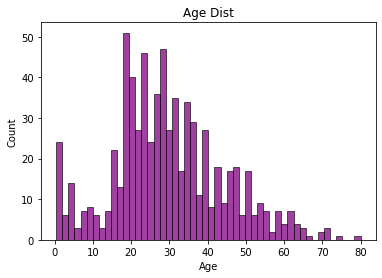

In [19]:

sns.histplot(train_df.Age, color='purple', bins=50)
plt.title("Age Dist")
plt.show()

In [20]:
train_df.Age.mean()


29.69911764705882

In [21]:
train_df.Age.median()

28.0

* median and mean age almost the same
* note this for replaceing null in age col

In [23]:
train_df.Age.value_counts().head(20)

24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
35.0    18
32.0    18
27.0    18
26.0    18
16.0    17
31.0    17
33.0    15
34.0    15
23.0    15
20.0    15
Name: Age, dtype: int64

In [41]:
# check age col null count  
train_df.Age.isnull().sum() 

177

In [42]:
# 177 null ages
# lets impute with mean

# replace null age with mean age in testing set
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [43]:
# confirm age replaced and no nulls remain 
train_df.Age.isnull().sum()

0


#sort the ages into logical categories
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
age_catagory = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = age_categories)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = age_categories)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df_train)
plt.show()

In [24]:
#Convert Catagorical to Numerical 
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
train_df.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


observations: 
* drop: ticket, cabin, 
* one hot encode: Sex, Embarked

In [26]:
# Execute cleaning
# these cols will not be used in analysis to determine predictor
# cabin had 687 nulls and will not be useful to predict survivor
# name won't help predict
# passenger ID unique ID wont help predict
# drop col that wont be useful in model


cols_to_drop = ['PassengerId','Name','Cabin', 'Ticket']

train_df = train_df.drop(columns = cols_to_drop)

train_df.shape

(891, 8)

shape confirms that 4 cols dropped

repeat with testing set

In [27]:
# drop the same columns that deemed not relevent for predicting survival 

id_column = test_df['PassengerId']  # save this col for submission 

columns_to_drop = ['PassengerId','Name','Cabin', 'Ticket']
test_df = test_df.drop(columns_to_drop, axis=1)

test_df.shape

(418, 7)

## EMBARKED 

In [64]:
# fill embarked wiht mode - only 2 missing
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [65]:
# check that embarked has no nulls
train_df.Embarked.isnull().sum()

0

In [71]:
## ONE HOT ENCODE
from sklearn.preprocessing import OneHotEncoder

#embarked transformed bec object
#Sex transformed bec object and dont want to assigne 1 and 1 bec not ordinal
#Pclass - bec computer might think 3rd class better than 1st class ???

OneHot = OneHotEncoder(categories='auto')

One_Hot_Cols = OneHot.fit_transform(train_df[['Embarked','Sex']]).toarray()

Col_Names = OneHot.categories_

In [72]:
# concat col name created by one hot encoder into single array
Col_Names = np.concatenate(Col_Names, axis=0)
Col_Names

array(['C', 'Q', 'S', 'female', 'male'], dtype=object)

In [75]:
# create one hot encoded dataframe
One_Hot_df = pd.DataFrame(One_Hot_Cols, columns = Col_Names)

In [76]:
One_Hot_df

,C,Q,S,female,male
0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,1.0
887,0.0,0.0,1.0,1.0,0.0
888,0.0,0.0,1.0,1.0,0.0
889,1.0,0.0,0.0,0.0,1.0


In [78]:
train_df = pd.concat([train_df, One_Hot_df], axis=1)


In [79]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0,1.0,0.0


In [80]:
#drop sex embarked

train_df.drop(columns=["Embarked", "Sex"], inplace=True) 

In [81]:
train_df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0


one_hot_encoded_alley = encoder.fit_transform(np.array(df['Alley']).reshape(-1,1)).toarray()
alley_columns_names = encoder.categories_[0]
print(alley_columns_names)
df_of_one_hot_encoded_alley = pd.DataFrame(one_hot_encoded_alley, columns=alley_columns_names)
df.drop(columns="Alley", inplace=True)
df = pd.concat([df, df_of_one_hot_encoded_alley], axis=1)

CORR whats lest

In [82]:
#check corr of col with our preictor
train_df.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
C           0.168240
Q           0.003650
S          -0.149683
female      0.543351
male       -0.543351
Name: Survived, dtype: float64

<AxesSubplot:>

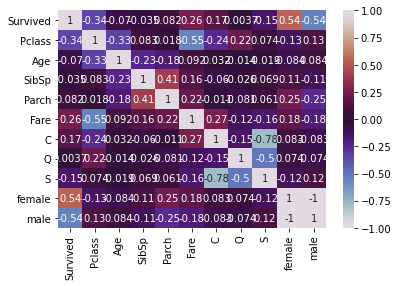

In [83]:
sns.heatmap(train_df.corr(),annot=True, cmap="twilight")

* no strong corr with our data set towards survivor
* fare has slight posative corr
* pclass has slight neg corr
* these two classes may be related but dont show sight of colinarity with .55 corr

## TESTING DATA CHECK

In [30]:
# check null values 
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

## FARE

In [32]:
# replace fare with mean fare in testing set and cast as int
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [33]:
#confirm there are no nulls in Fare col
test_df.Fare.isnull().sum()

0

## AGE

In [35]:
# identify the mean and median of Age in testing dataset indep of training dataset
test_df.Age.mean()

30.272590361445783

In [36]:
test_df.Age.median()

27.0

In [37]:
#impute testing dataset with the testing mean age

test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [39]:
# confirm age replaced and no nulls remain 
test_df.Age.isnull().sum()

0

In [44]:
test_df.shape

(418, 7)

In [45]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

## One_Hot_Encode

In [85]:
## One Hot Encode Testing Data
OneHot = OneHotEncoder(categories='auto')

One_Hot_Cols = OneHot.fit_transform(test_df[['Embarked','Sex']]).toarray()

Col_Names = OneHot.categories_

In [86]:
# concat col name created by one hot encoder into single array
Col_Names = np.concatenate(Col_Names, axis=0)
Col_Names

array(['C', 'Q', 'S', 'female', 'male'], dtype=object)

In [87]:
# create one hot encoded dataframe
One_Hot_test_df = pd.DataFrame(One_Hot_Cols, columns = Col_Names)

In [88]:
test_df = pd.concat([test_df, One_Hot_test_df], axis=1)

In [90]:
test_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,3,male,34.5,0,0,7.8292,Q,0.0,1.0,0.0,0.0,1.0
1,3,female,47.0,1,0,7.0000,S,0.0,0.0,1.0,1.0,0.0


In [91]:
#drop sex embarked

test_df.drop(columns=["Embarked", "Sex"], inplace=True) 

confirm shape and cols in testing 

In [92]:
test_df.head(2)

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0


**ANY DROPPED COLUMNS REQUIRE AN EXPLANATION.**

### Exploratory Data Analysis
This area should contain your visualizations as you seek to understand the relationships that exists within the data before running your linear regression algorithm.

Express your curiosities in markdown, followed by your code to create the visualization that explores that curiosity.

In [ ]:
# Code for visualization

**EVERY VISUALIZATION REQUIRES AN ASSOCIATED DECSRIPTION** *(in addition to titles, axis labels, specified units of measurements, and legend if necessary.)*

<function matplotlib.pyplot.show(close=None, block=None)>

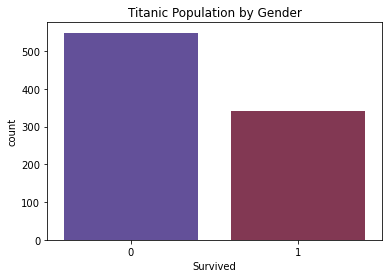

In [55]:
sns.countplot(x="Survived", data=train_df, palette="twilight")
plt.title("Survived")
plt.show

survived reasonable balanced

### GENDER 

<function matplotlib.pyplot.show(close=None, block=None)>

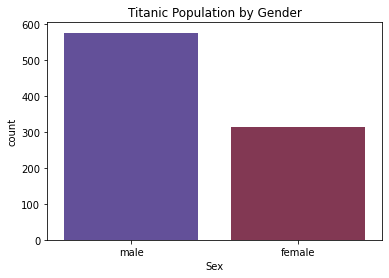

In [57]:
sns.countplot(x="Sex", data=train_df, palette="twilight")
plt.title("Titanic Population by Gender")
plt.show

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


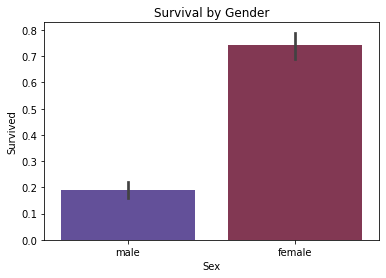

In [46]:
#survival by sex
sns.barplot(x="Sex", y="Survived", data=train_df, palette="twilight")
plt.title("Survival by Gender")
plt.show

#% females vs. males survivores
print("Percentage of females who survived:", train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train_df["Survived"][train_df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

74% of females in our training datasest survived - very interesting 

## CLASS

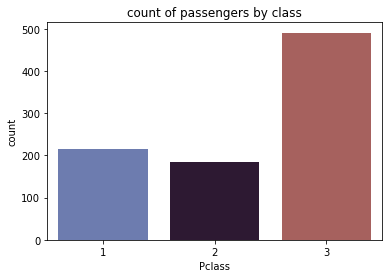

In [48]:
#check number of passengers by class 
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Pclass", data=train_df, palette="twilight")
plt.title("count of passengers by class" )
plt.show()

It is not surprising: most of passengers in in third class

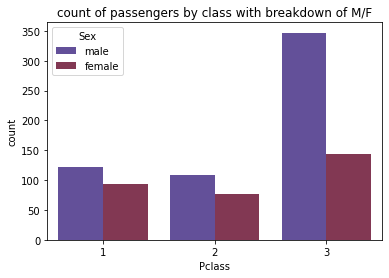

In [53]:
#check breakdown of gender within class

sns.countplot(x="Pclass", hue="Sex", data=train_df, palette= "twilight")
plt.title("count of passengers by class with breakdown of M/F" )
plt.show()

* males > females in all Pclasses 
* class 3 having more than 2x as many men to females

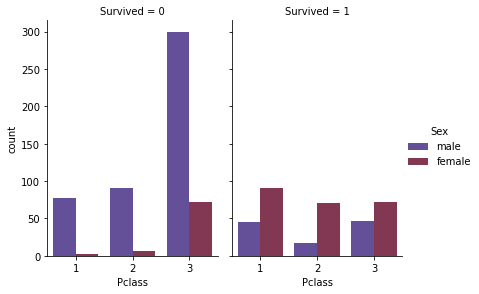

In [58]:
#check breakdown by of sruvived by class and gender

sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=train_df, kind="count",
                height=4, aspect=.7, palette="twilight")
plt.show()

More females survived in all classes

Percentage of Survivors: Pclass = 1: 62.96296296296296
Percentage of Survivors Pcalss = 2: 47.28260869565217
Percentage of Survivors = Pcalss = 3: 24.236252545824847


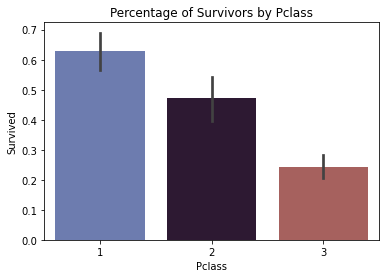

In [62]:
#survived by Pclass

sns.barplot(x="Pclass", y="Survived", data=train_df, palette="twilight")
plt.title("Percentage of Survivors by Pclass")
plt.show

#print percentage of people by Pclass that survived
print("Percentage of Survivors: Pclass = 1:", train_df["Survived"][train_df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Survivors Pcalss = 2:", train_df["Survived"][train_df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Survivors = Pcalss = 3:", train_df["Survived"][train_df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

* 62% of survivors from 1st class
* 47% from 2nd class
* 24% from 3rd class


<function matplotlib.pyplot.show(close=None, block=None)>

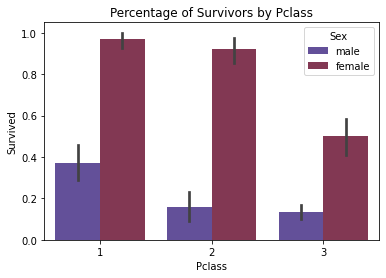

In [63]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_df, palette="twilight")
plt.title("Percentage of Survivors by Pclass")
plt.show

In [67]:
train_df.groupby(["Pclass", 'Survived'])["Age"].describe()

count       mean        std    min        25%        50%  \
Pclass Survived                                                             
1      0          80.0  40.896074  14.766000   2.00  29.699118  38.500000   
       1         136.0  34.784615  13.141263   0.92  26.000000  33.500000   
2      0          97.0  33.266947  11.742843  16.00  25.000000  30.000000   
       1          87.0  26.076166  14.510680   0.67  18.000000  28.000000   
3      0         372.0  27.417500  10.596718   1.00  21.000000  29.699118   
       1         119.0  23.232689  10.922065   0.42  18.000000  27.000000   

                       75%   max  
Pclass Survived                   
1      0         51.250000  71.0  
       1         43.250000  80.0  
2      0         38.000000  70.0  
       1         34.000000  62.0  
3      0         30.000000  74.0  
       1         29.699118  63.0

class 1 has older passengers and class 3 has younger

### EMBARKED

Percentage of Survivors: Embarked = S: 33.90092879256966
Percentage of Survivors Embarked = C: 55.35714285714286
Percentage of Survivors = Embarked = Q: 38.961038961038966


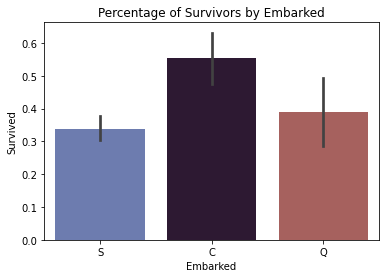

In [68]:
sns.barplot(x="Embarked", y="Survived", data=train_df, palette="twilight")
plt.title("Percentage of Survivors by Embarked")
plt.show

#print percentage of people by Pclass that survived
print("Percentage of Survivors: Embarked = S:", train_df["Survived"][train_df["Embarked"] == "S"].value_counts(normalize = True)[1]*100)

print("Percentage of Survivors Embarked = C:", train_df["Survived"][train_df["Embarked"] == "C"].value_counts(normalize = True)[1]*100)

print("Percentage of Survivors = Embarked = Q:", train_df["Survived"][train_df["Embarked"] == "Q"].value_counts(normalize = True)[1]*100)

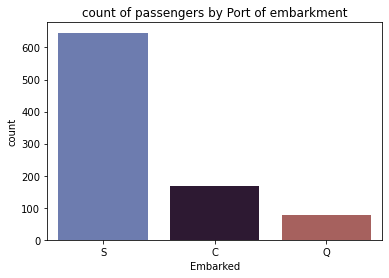

In [69]:
#check number of passengers by port of empbarkment
ax = sns.countplot(x="Embarked", data=train_df, palette="twilight")
plt.title("count of passengers by Port of embarkment" )
plt.show()

In [110]:
test_df.isnull().sum()


Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
C         0
Q         0
S         0
female    0
male      0
dtype: int64

In [116]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


### Data Processing
Here you prepare your data for training and testing. You'll select what predictors you want to include in your training and what you want to leave out, again providing an explanation. These can be varibales you've identified having little coorelation to your target variable.

In [126]:
# Preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [132]:
# this is where we would test train but the dataset is already divided into testing and training 
# train test split 
from sklearn.model_selection import train_test_split

# split training data into 80/20
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### ML Model
Implementing a cross validation technique, train and test your model with you preprocessed data.

In [133]:
# Cross validation and performance metrics

In [134]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=1000)

lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)

converage needs to be addressed

In [135]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

0.770949720670391

In [136]:
# # using testing set
# # generate outcomes (prediction in list form and comparing predict to actual outcomes )

# regressor = LinearRegression()
# score = cross_val_score(regressor, x_train, y_train,cv=5)
# print(score)

ValueError: Found input variables with inconsistent numbers of samples: [891, 712]

In [137]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

ValueError: Found input variables with inconsistent numbers of samples: [891, 712]

In [125]:
# # check classification scores of logistic regression
# logreg = LogisticRegression(max_iter=1000)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

### Model Evaluation
Using the metrics gathered when training and testing your model, visualize the performance of your model.

In [ ]:
# Model Evaluation Code

Provide context to the meaning of your visuals or any performance metrics derived.

In [138]:
#Kfolds cross validate
#option for scoring precision and/or accuracy
regressor = LogisticRegression(max_iter=1000)
scores = cross_validate(regressor, X_train, y_train, cv=ShuffleSplit(n_splits=5, test_size=0.3),scoring=('accuracy', 'precision'))
#scores is a dict keys are metric values are array of dif vals
print(scores)
print(scores['test_precision'].mean())
print(scores['test_accuracy'].mean())

{'fit_time': array([0.04658103, 0.03246999, 0.05443978, 0.03159285, 0.02631879]), 'score_time': array([0.00240898, 0.00237989, 0.00213408, 0.001899  , 0.0017662 ]), 'test_accuracy': array([0.78504673, 0.76168224, 0.81308411, 0.8317757 , 0.79439252]), 'test_precision': array([0.71428571, 0.73972603, 0.74324324, 0.81967213, 0.76119403])}
0.755624229184901
0.7971962616822431


In [ ]:
regressor.fit()

---
<br>

### Conclusion
State your overall findings, being sure to mention any next steps you would take going forward, or anything you would do differently provided the time and resources.

In [ ]:
Gender was strongest predictor of survival 
other features can be studied in more detail 

## SUBMISSION 

In [119]:
submission_prediction = lgr.predict(test_df)
submission = pd.DataFrame({'PassengerId': id_column.values, 'Survived': submission_prediction})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
test_model_df['Id'] = test_df['Id']
test_model_df

In [ ]:
submission_df = test_model_df[['Id','Survived']]

In [121]:
submission.to_csv('/Users/tkhstudent29/Desktop/titanic_prediction.csv' , index=False, header=True)

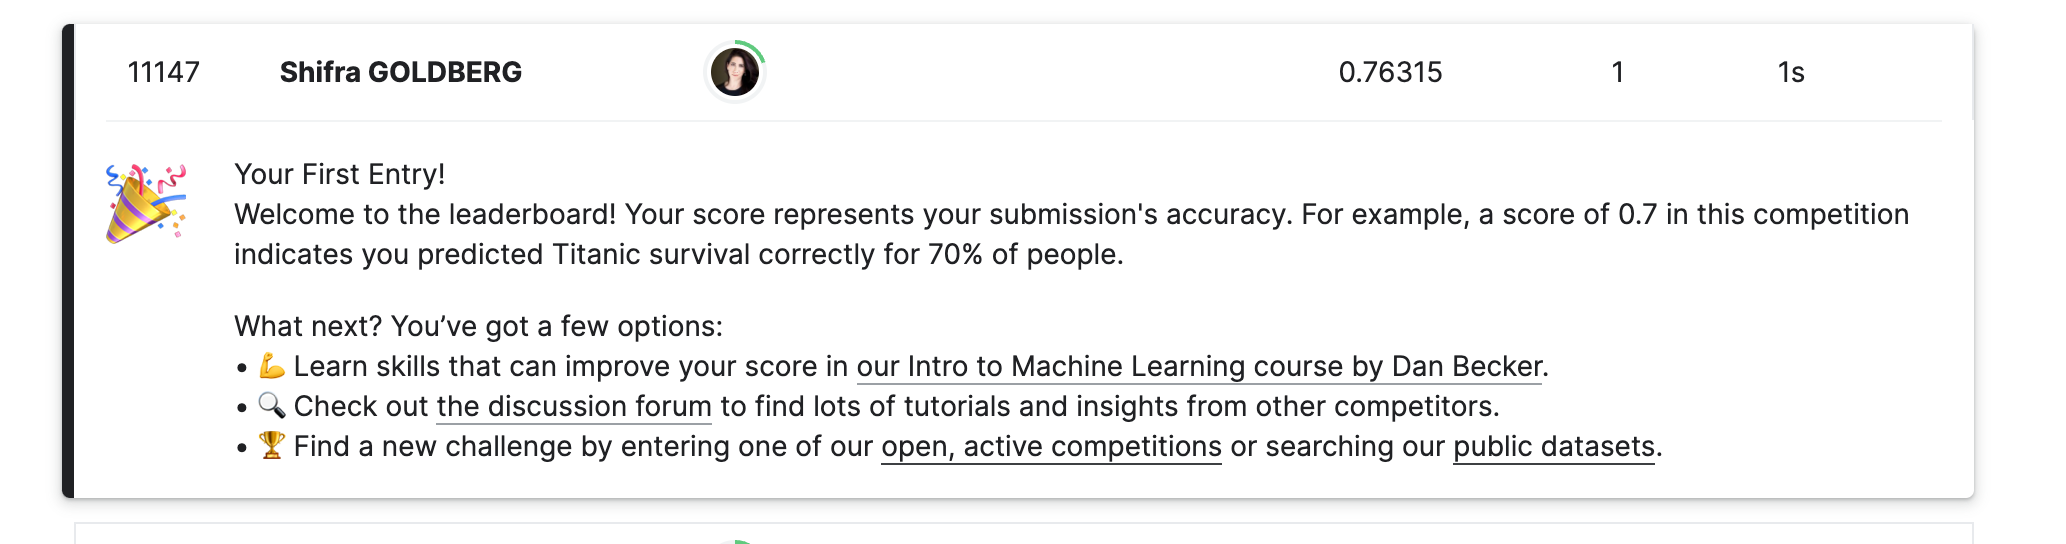